In [ ]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv (r'/content/newAbc.csv', encoding='mac_roman')
# print(df)

# Create df for all letters
df_all = df.melt(id_vars=['id', 'Year', 'Title'], var_name="Letters").dropna()
# df_all = df.melt(var_name="Letters").dropna()

# Drop id, Year, Title
df_all.drop(columns=['id', 'Year', 'Title', 'Letters']) # why isn't this dropping
print(df_all)

# Trying to remove punctuation
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)
# print(df)

# Data for each book: Title, Year, A, B, ...
# df.columns
# for idx,column in enumerate(df.columns):
#  print(idx,column)

# Create array of dfs of each letter
df_Title = df['Title']
df_letters = []
from string import ascii_uppercase
for letter in ascii_uppercase:
    df_letters.append(df[letter])

# print(df_letters[1])

        id  Year  ... Letters                                              value
0      274  1917  ...       A  Agitated Aunts Alice and Ada and an abominably...
1      281  1931  ...       A  APPLES McINTOSH Reds and Russets, Wealthys and...
2     2638  1899  ...       A  A stands for Archibald who told no lies, And g...
3      262  1900  ...       A               A  WAS AN ADMIRAL PROUD OF HIS FLEET
4     2636  1859  ...       A               a was an Archer, And shot at a Frog.
...    ...   ...  ...     ...                                                ...
3229   243  1824  ...      NO  Nathan Prophet Reproof Sin Parable Mourn Offer...
3319   243  1824  ...      PQ  Pilate Wash Hands Governor Judea Seal Quail Bi...
3409   243  1824  ...      RS  Ruth Glean Field Corn Boaz Wife Samson Strong ...
3499   243  1824  ...     TUV  Thomas Doubt Truth Uriah Faithful Brave Viper ...
3589   243  1824  ...      YZ  Yoke Oxen Plough Angel John Baptism Zacharias ...

[2287 rows x 5 columns]


In [ ]:
df_letters[0]

0     Agitated Aunts Alice and Ada and an abominably...
1     APPLES McINTOSH Reds and Russets, Wealthys and...
2     A stands for Archibald who told no lies, And g...
3                  A  WAS AN ADMIRAL PROUD OF HIS FLEET
4                  a was an Archer, And shot at a Frog.
                            ...                        
85    A for the Arab. He lives in Arabia and in Nort...
86                A was an Archer, that shot at a Frog.
87    A for ALICE in WONDERLAND A is for Alice and a...
88    I have painted 361 things beginning with the l...
89    A is the Artist, Who drew in these pages- He's...
Name: A, Length: 90, dtype: object

In [ ]:
df_all
df_all['value']

0       Agitated Aunts Alice and Ada and an abominably...
1       APPLES McINTOSH Reds and Russets, Wealthys and...
2       A stands for Archibald who told no lies, And g...
3                    A  WAS AN ADMIRAL PROUD OF HIS FLEET
4                    a was an Archer, And shot at a Frog.
                              ...                        
3229    Nathan Prophet Reproof Sin Parable Mourn Offer...
3319    Pilate Wash Hands Governor Judea Seal Quail Bi...
3409    Ruth Glean Field Corn Boaz Wife Samson Strong ...
3499    Thomas Doubt Truth Uriah Faithful Brave Viper ...
3589    Yoke Oxen Plough Angel John Baptism Zacharias ...
Name: value, Length: 2287, dtype: object

Finding the 10 most common words in a dataframe.

In [ ]:
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

# Breakdown to individual words and view top x words and frequency
word_list = [str(word).lower().split() for word in df_all['value']]

# Flatten list of words in a letter dataframe
all_word_list = list(itertools.chain(*word_list))

# Create counter of words in a letter dataframe
counts_word = collections.Counter(all_word_list)

counts_word.most_common(10)


# names = c[0] HELP
# print(names)
# values = c[1]
# plt.figure(figsize=(9, 3))
# plt.bar(names, values)







[('the', 2947),
 ('and', 1980),
 ('a', 1823),
 ('for', 1320),
 ('is', 1228),
 ('to', 1073),
 ('of', 965),
 ('in', 835),
 ('he', 636),
 ('his', 582)]

Custom word removal

In [ ]:
# Custom word removal
# custom_words_removal = ["the"]
# custom_words_removal = ["a", "and", "the", "for", "is", "to", "an", "in", "of", "that"]
words_cleanedv2 = [[w for w in word if not w in custom_words_removal] for word in word_list]

# Flatten list of words in clean tweets
all_word_list_v2 = list(itertools.chain(*words_cleanedv2))

# Create counter of words in clean tweets
counts_word_v2 = collections.Counter(all_word_list_v2)

counts_word_v2.most_common(10)

[('he', 636),
 ('his', 582),
 ('with', 513),
 ('was', 488),
 ('who', 374),
 ('it', 361),
 ('on', 358),
 ('you', 355),
 ('so', 332),
 ('all', 308)]

Word cloud

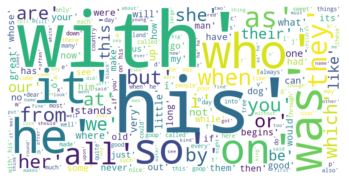

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_words = [str(p) for p in words_cleanedv2]
wordcloud_string = ' , '.join(wordcloud_words)

# Create and generate a word cloud image
wordcloud_words = WordCloud(background_color='white', width=800, height=400).generate(wordcloud_string)

# Display the generated image for Positive words
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image to designated folder:
wordcloud_words.to_file('WC Visualization.png')


Plotting 10 most common Bigrams, Trigrams, and N-Grams word sequences.

In [ ]:
from nltk import bigrams
from nltk import trigrams
from nltk.util import ngrams
from IPython.display import display, HTML

# Create list of lists containing bigrams in texts
terms_bigram = [list(bigrams(word)) for word in words_cleanedv2]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(10)
bigram_df = pd.DataFrame(bigram_counts.most_common(10), columns=['Bigram', 'Count'])

print("\nBigram results: ")
display(bigram_df.head())


Bigram results: 


,Bigram,Count
0,"(ha, !)",51
1,"(!, hee)",51
2,"((this, goop)",50
3,"(goop, called)",50
4,"(he, was)",50


In [ ]:
from nltk import bigrams
from nltk import trigrams
from nltk.util import ngrams
from IPython.display import display, HTML

# Create list of lists containing bigrams in texts
terms_trigram = [list(trigrams(word)) for word in words_cleanedv2]

# Flatten list of bigrams in clean tweets
trigrams = list(itertools.chain(*terms_trigram))

# Create counter of words in clean bigrams
trigram_counts = collections.Counter(trigrams)

trigram_counts.most_common(10)
trigram_df = pd.DataFrame(trigram_counts.most_common(10), columns=['Trigram', 'Count'])

print("\nBigram results: ")
display(trigram_df.head())

RuntimeError: ignored

Creating dataframes for analysis. df_letters$[i]$ gives the dataframe of the ith letter, though its format is not a dataframe. I want to create a simple dataframe of all the text (so merging texts from each letter together). 